In [1]:
%load_ext autoreload
%autoreload 2
# You can load your python module as this:
import dataproject.example

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
dataproject.example.hello_world()

'hello world'

In [ ]:
#import of packeges 

In [ ]:
#import and inspect data

In [ ]:
#cleaning and restructuring of data

In [ ]:
#functions

In [ ]:
#descriptive statistics  

In [ ]:
#timeseries - the variable over time

In [ ]:
#final interactive model - where you chose country and get all the info - optional

In [4]:
pwd

'C:\\Users\\augus\\Documents\\Uni\\Kandidat i Statskundskab\\1. semester kadidat\\Numerical analysis and programming\\python\\projects-2019-al\\dataproject'

            country countrycode  emissions_GHG
0         Australia         AUS     539171.826
1         Australia         AUS     540445.363
2         Australia         AUS     543593.864
3         Australia         AUS     533313.692
4         Australia         AUS     527325.581
5         Australia         AUS     537550.854
6         Australia         AUS     549157.716
7           Austria         AUT      84930.835
8           Austria         AUT      82449.673
9           Austria         AUT      79916.894
10          Austria         AUT      80177.997
11          Austria         AUT      76441.572
12          Austria         AUT      78855.710
13          Austria         AUT      79672.644
14          Belgium         BEL     132712.351
15          Belgium         BEL     122057.796
16          Belgium         BEL     119279.988
17          Belgium         BEL     119691.092
18          Belgium         BEL     114010.300
19          Belgium         BEL     117584.429
20          B

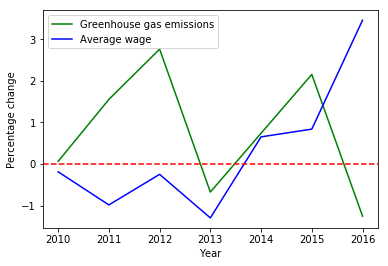

interactive(children=(Dropdown(description='x', options=('Australia', 'Austria', 'Belgium', 'Canada', 'Switzer…

<function __main__.get_con(x='Australia')>

In [26]:
#This is the main file, here we do most things
#Always use git change before writing anything!

#to upload changes: 
#1) git commit 
#2) git sync

#importing packeges
import pip 
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

#importing our other sheets
#Here we will clean all the data


#Here we import the CO2 database from OECD
df = pdr.DataReader("AIR_GHG","oecd")

#the data is in "multi-index form", these codes turns it into a more common non-hieracical structure
df.reset_index()
dir(df.index)
df.columns = [' '.join(col).strip() for col in df.columns.values]

#The countries are not "availeble to grap" so i have manually made a list using excel
countries = ["Australia","Austria","Belgium","Canada","Chile","Czech Republic","Denmark","Estonia","Finland","France","Germany","Greece","Hungary","Iceland",	
    "Ireland","Israel","Italy","Japan","Korea","Latvia","Lithuania","Luxembourg","Mexico","Netherlands","New Zealand","Norway","Poland","Portugal","Slovak Republic",
    "Slovenia","Spain","Sweden","Switzerland","United Kingdom","United States"]	
countrycode = ["AUS", "AUT", "BEL", "CAN", "CHL", "CZE", "DNK", "EST", "FIN", "FRA", "DEU","GRC", "HUN", "ISL", "IRL", "ISR", "ITA", "JPN", 
    "KOR", "LVA", "LTU", "LUX", "MEX", "NLD", "NZL", "NOR", "POL", "PRT", "SVK", "SVN", "SWE", "ESP", "CHE", "GBR", "USA"]
ccc = dict(zip(countries,countrycode))
# I initiate an empty list for the dataset and set the counter to 0
x = []
i = 0
for c in countries:
    for y in df.index.values : 
        x.append({"country" : c, "countrycode" : ccc[c],"emissions_GHG" : df[c+" "+"Greenhouse gases Total  emissions excluding LULUCF"][i]})
        i = i + 1 
        if i > 6 :
            i = 0

#In the for-loop i make a row for each country for each year, and insert a country, a year and the corrosponding of emissions of GHG (Green House Gases)
df_env = pd.DataFrame(x)
print(df_env)

#Here we import average income per capita data
data_wages= pd.read_csv("oecdwages.csv")
#drop column that we do not need
drop_these= ["INDICATOR","FREQUENCY","MEASURE","SUBJECT", "Flag Codes"]
copy = data_wages.drop(drop_these, axis=1, inplace=False)
copy.rename(columns = {'LOCATION':'countrycode', 'Value' : 'average wage', 'TIME' : 'year'}, inplace=True)
c = copy["countrycode"].unique()


#here i reset the index of the two variables, and sort by the common variable (countrycode). Then i merge by index position 
left = copy.sort_values("countrycode")
left = left.reset_index()
rigth = df_env.sort_values("countrycode")
rigth = rigth.reset_index()
data_all = left.merge(rigth,left_index=True,right_index=True)

#this for loop test if all the values of the countrycodes are the same in the same row
for i in data_all.index.values : 
    if data_all["countrycode_x"][i]==data_all["countrycode_y"][i] :
        if i == data_all.index.values[-1] : 
            print("Done")
    else :  
        print("mistake in "+data_all["country"][i])

#I then drop a few columns that are not needed
drops = ["index_x","index_y","countrycode_y"]
data_all.drop(drops,axis=1,inplace=True)
data_all.rename(columns ={"countrycode_x":"countrycode"},inplace=True)
#data_all.set_index("year",inplace=True)


#i make to lagged variables and take the log of them (this is almost like use percentage change in GHG and average wage)
data_all['d_GHG'] = data_all.groupby('countrycode')['emissions_GHG'].apply(lambda x: x.pct_change())*100
data_all['d_aw'] = data_all.groupby('countrycode')['average wage'].apply(lambda x: x.pct_change())*100

GHG_change = data_all.groupby("year").d_GHG.mean()

AW_change = data_all.groupby("year").d_aw.mean()



#fooling around with some plots

plt.plot(GHG_change,color="g")
plt.plot(AW_change,color="b")
plt.xlabel("Year")
plt.ylabel("Percentage change")
plt.legend(["Greenhouse gas emissions","Average wage"])
plt.axhline(y=0,color="r",linestyle="dashed")
plt.show()


def get_con(x="Australia"):
    print("Country: "+x)
    print("Mean of Greenhouse gas emissions:" , round(data_all[data_all["country"]==x]["emissions_GHG"].mean(),2))
    print("Mean of average wages:" , round(data_all[data_all["country"]==x]["average wage"].mean(),2))
    return x

widgets.interact(get_con,x=data_all["country"].unique())
